<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [13]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1') # Encoding ile UTF-8'e uygun hale getirdik.

<IPython.core.display.Javascript object>

In [14]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

<IPython.core.display.Javascript object>

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [5]:
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [6]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [7]:
data = pd.concat([df_male,df_female], axis=0, ignore_index=True)
data.head()

<IPython.core.display.Javascript object>

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0    10027.0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1    10032.0                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2    10033.0                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3    10092.0                           

In [8]:
data.shape

(6068, 109)

In [9]:
data.info(verbose=True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [10]:
data.isnull().sum().any()

True

In [11]:
data.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


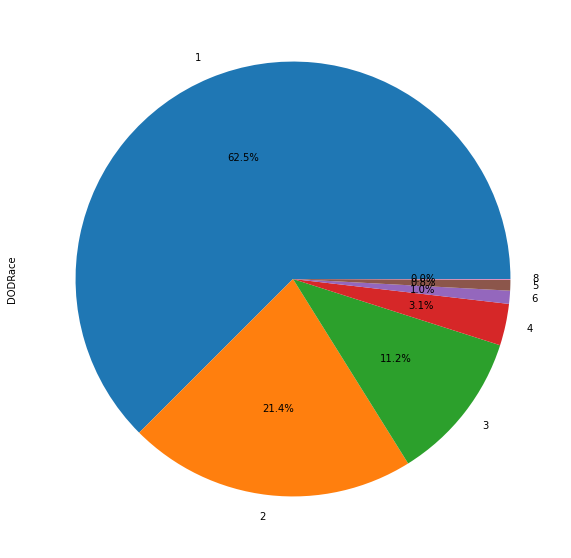

In [12]:
print(data["DODRace"].value_counts())
data["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

Missing value sayisi 1800' den fazla olan (1/3'u bos) datalari gormek icin bir fonksiyon tanimladik; sonra bunlari sildik :

In [13]:
drop_list =[]
for col in data:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [14]:
data.drop(drop_list, axis=1, inplace=True)

In [15]:
data.isnull().sum().any()

False

In [16]:
data.shape

(6068, 106)

Object olan sutunlardaki unique degerlere bakalim. Cunku bunlari daha sonra get_dummies yapacagiz :

In [17]:
# to find how many unique values object features have
for col in data.select_dtypes("object"):
  print(f"{col} has {data[col].nunique()} unique value")
    

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


Yukaridaki object sutunlardan bazilarini gereksiz oldugu icin silecegiz. SubjectBirthLocation cok fazla unique degere sahip fakat ozellikle Shap analizinde sonuclari olumlu yonde etkileyecegi icin bunu tutacagiz.

In [18]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

Target label' daki rakamlarin ne anlama geldigini daha iyi anlayabilmek icin isimlerini degistirdik :

In [19]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

"Component" ve "Branch" sutunlarini silmeye karar verdik ama yine de dagilima bir etkisi var mi diye baktik. Bazi birliklerde Hispanic' lerin sayisi daha fazla ise katkisi olabilirdi (Datada hispanic sayisi az oldugu icin onu onemsiyoruz). Fakat dagilimin esit oldugunu gorduk. Bu yuzden silecegiz :

In [20]:
data.groupby(["Component"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            DODRace         
Army National Guard  White               1855
                     Black                499
                     Hispanic             253
                     Asian                 60
                     Native American       24
                     Pacific Islander      17
Army Reserve         White                114
                     Black                 52
                     Hispanic              41
                     Asian                  9
                     Pacific Islander       3
                     Native American        1
Regular Army         White               1823
                     Black                747
                     Hispanic             385
                     Asian                119
                     Pacific Islander      39
                     Native American       24
                     Other                  3
Name: DODRace, dtype: int64

In [21]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

Gereksiz veya fazla olan feature' lari dusurelim :

In [22]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin",   
]

data.drop(drop_list1, axis=1, inplace=True)

In [23]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [24]:
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

Askerlerin etnigi ile cok detayli bilgi veren "SubjectNumericRace" sutununu dusurmeye karar verdik :

In [25]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

500' un altindakileri silmeye karar vermistik. Bunu target label' a da uyguluyoruz. Yani target' ta sadece White, Black ve Hispanic kalacak :

In [26]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [257]:
data.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [27]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [28]:
data.reset_index(drop=True, inplace=True)  # Sildigimiz degerlerden dolayi datayi bastan indexlememiz gerekir.

In [29]:
data

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

Asagida heatmap' te degerleri cok ayrintili analiz edemesek de yogun kirmizi renkli olan feature' lar arasinda multicollinearity oldugunu gorebiliyoruz. Fakat biz multicollinearity sorunu ile ugrasmayacagiz. Cunku Logistic Regression arka planda regularization ile bu sorunu cozecek. Multicollinearity' nin feature importance' a cok etkisi var. SVC model destance tabanli bir model oldugu icin o modelde feature importance elde edemeyecegiz. Bu yuzden multicollinearity bizim icin bir sorun teskil etmiyor :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

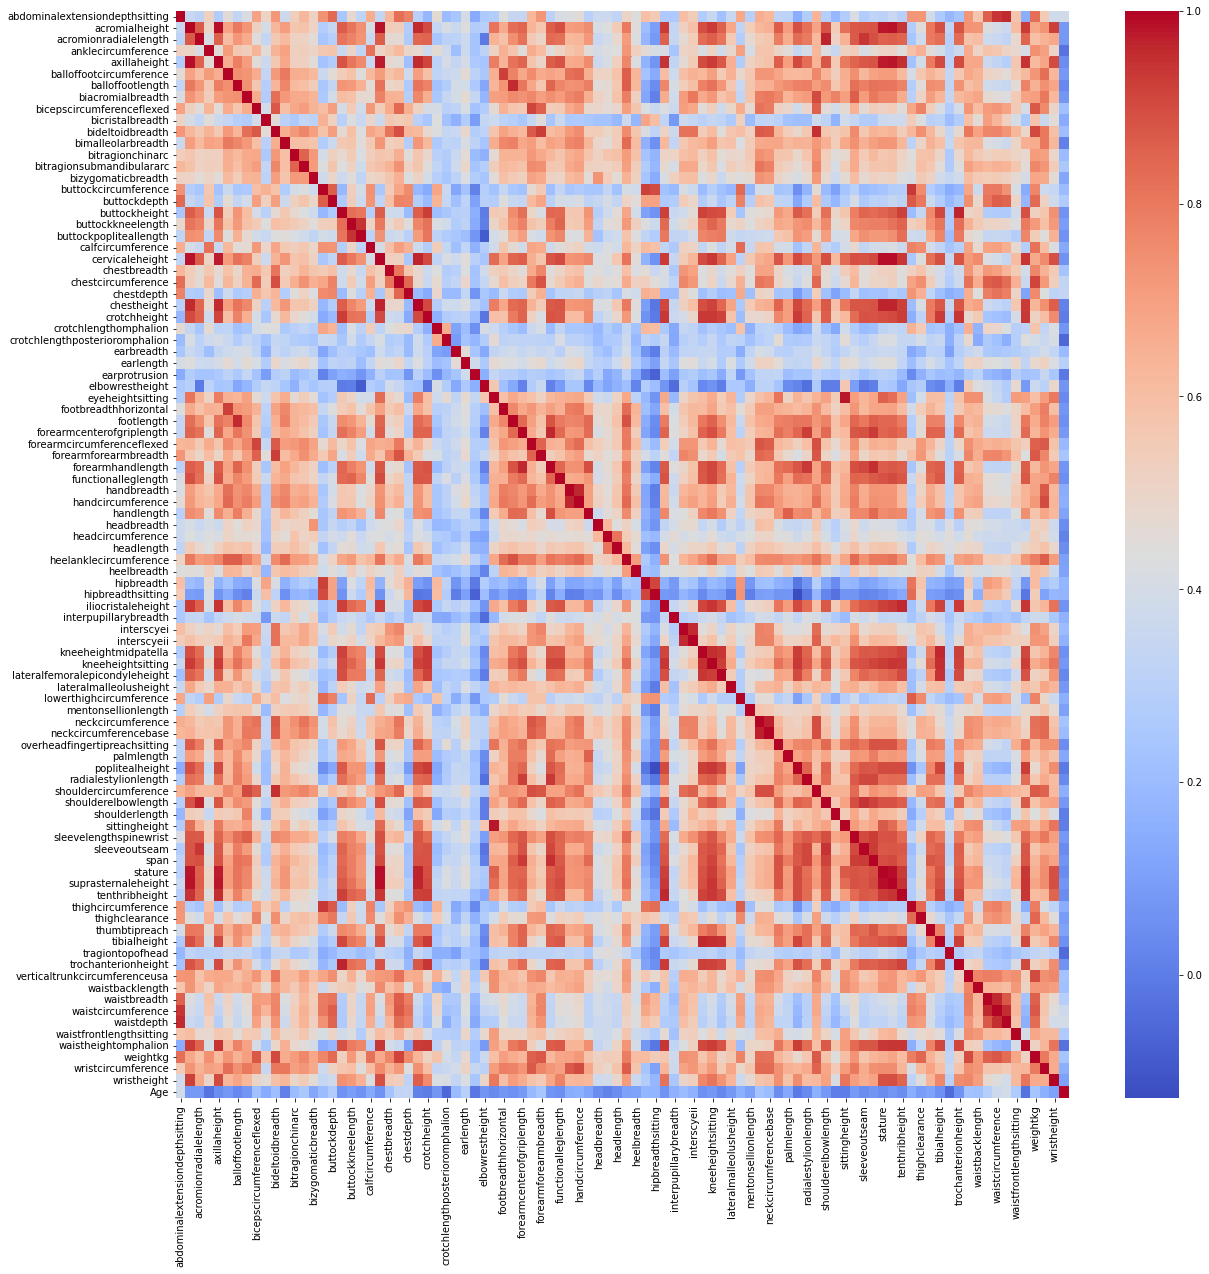

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm")

Birbirleriyle cok fazla multicollinearity iliskisi olan feature' lari tespit etmek icin bir fonksiyon yazdik :

In [31]:
df_temp = data.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")

In [32]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

<IPython.core.display.Javascript object>

feature                       collinear
0    abdominalextensiondepthsitting              waistcircumference
1    abdominalextensiondepthsitting                      waistdepth
2                    acromialheight                    axillaheight
3                    acromialheight                 cervicaleheight
4                    acromialheight                     chestheight
5                    acromialheight              iliocristaleheight
6                    acromialheight               kneeheightsitting
7                    acromialheight                         stature
8                    acromialheight             suprasternaleheight
9                    acromialheight                  tenthribheight
10                   acromialheight            waistheightomphalion
11                   acromialheight                     wristheight
12            acromionradialelength             shoulderelbowlength
13            acromionradialelength                   sleeveoutseam
14                     axillaheight                  acromialheight
15                     axillaheight                 cervicaleheight
16                     axillaheight                     chestheight
17                     axillaheight                    crotchheight
18                     axillaheight              iliocristaleheight
19                     axillaheight            kneeheightmidpatella
20                     axillaheight               kneeheightsitting
21                     axillaheight                 poplitealheight
22                     axillaheight                         stature
23                     axillaheight             suprasternaleheight
24                     axillaheight                  tenthribheight
25                     axillaheight                    tibialheight
26                     axillaheight            waistheightomphalion
27                     axillaheight                     wristheight
28          balloffootcircumference           footbreadthhorizontal
29                 balloffootlength                      footlength
30                biacromialbreadth           shouldercircumference
31        bicepscircumferenceflexed      forearmcircumferenceflexed
32                 bideltoidbreadth           forearmforearmbreadth
33                 bideltoidbreadth           shouldercircumference
34                 bideltoidbreadth                        weightkg
35             buttockcircumference                      hipbreadth
36             buttockcircumference              thighcircumference
37                    buttockheight                    crotchheight
38                    buttockheight              iliocristaleheight
39                    buttockheight            kneeheightmidpatella
40                    buttockheight               kneeheightsitting
41                    buttockheight                  tenthribheight
42                    buttockheight                    tibialheight
43                    buttockheight             trochanterionheight
44                buttockkneelength          buttockpopliteallength
45           buttockpopliteallength               buttockkneelength
46                  cervicaleheight                  acromialheight
47                  cervicaleheight                    axillaheight
48                  cervicaleheight                     chestheight
49                  cervicaleheight                    crotchheight
50                  cervicaleheight             functionalleglength
51                  cervicaleheight              iliocristaleheight
52                  cervicaleheight            kneeheightmidpatella
53                  cervicaleheight               kneeheightsitting
54                  cervicaleheight                 poplitealheight
55                  cervicaleheight                            span
56                  cervicaleheight                         stature
57                  cervicaleheight             suprasternaleheight
58              

"Hangi fueature digerleri ile en fazla multicollinearity?" bunu asagida goruyoruz. "kneeheightsitting" gibi diger feature' larla en cok multicollinearity' si olan feature' lar tutulup, multicollinearity sorunu yasadigi feature' lar silinerek de yola devam edilebilirdi. Bu sekilde yola daha az feature ile devam edilip complexity de azaltilabilirdi. Modellerimiz multicollinearity' i sorun etmedigi icin ve Shap' da feature selection yapacagimiz icin bu asamaya gerek yok :

In [33]:
df_col.value_counts("feature")   

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

Logistic Regression Gradient Descent tabanli SVM ise distance tabanli bir model. Bu modeller icin mutlaka get_dummies yapilmali (Tree based modellerde dummy islemi uygulamayacagiz. Bu yuzden o modellerde yeni X ve y tanimlayacagiz : 

In [34]:
X = data.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data.DODRace

<IPython.core.display.Javascript object>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

Target' ta dengesizlik olabilir diye 'stratify =y' yi ekledik.

In [36]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

class_weight='balanced' default deger degil fakat target' ta unbalance bir durum oldugunu ongordugumuz icin bunu bastan tanimladik.

Scale islemleri yapilirken mutlaka Pipeline  kullanilmali (Cross Validate ve GridSearch' de olusacak olan data leakage' i engellemek icin) :

In [38]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

Yukarida scale islemini yaptik ve modelimizi kurduk. Asagida da egittik.

In [39]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  355 2621]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



Yukaridaki skorlarda Train ve Test seti arasinda hehangi bir dengesizlik gorulmuyor. Black classinin skorlarinin cok yuksek oldugunu goruluyor. Demek ki Black class' i digerlerine gore daha cok ayirt edici ozelliklere sahip. Hispanic class' inda degerler arasinda ciddi bir dengesizlik var. Bundan sonraki asamalarimizda Hispanic class' ina ait Precision, Recall ve F1 skorlarini iyilestirme uzerine calisacagiz. Ozel olarak bu class ile ilgilendigimiz icin make_scorer' i kullanabiliriz. :

In [40]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

Cross Validation isleminde once modelimizi sifirladik. Cross Validate isleminden sonra Hispanic class' ina ait skorlarin, yukaridaki tek seferlik skorlar ile dengeli oldugunu goruyoruz.

In [41]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.599993
test_precision_Hispanic    0.492007
test_recall_Hispanic       0.771481
dtype: float64

### Logistic Model GridsearchCV

Amacimiz Hispanic class' inin Recall skorunu yukseltmek oldugu icin asagida boyle bir degisken tanimladik :

In [42]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

'liblinear' kucuk datalarda guzel sonuclar verdigi icin GridSearch' e onu da ekledik :

In [43]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [44]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,      # Hispanic turunun skorlarini artiracak en iyi parametreleri bul.
                              n_jobs=-1, cv=5)

In [45]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [46]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [47]:
log_model_grid.best_score_

0.7697757390417942

GridSearch isleminden cikan best parametrelerin default degerler oldugunu goruyoruz. Demek ki default degerlerimiz en iyi sonucu veren degerlermis. GridSearch isleminden sonra terar CrossValidate yapmaya gerek yok.

In [48]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  355 2621]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



Dengesiz bir dataseti oldugu icin PrecisionRecallCurve' e baktik. Hispanic class' inin skorlari kotu oldugu icin onun skorlarina odaklaniyoruz. Modelin genel performansina gore Hispanic' leri tespit etmedeki genel basari %73 :

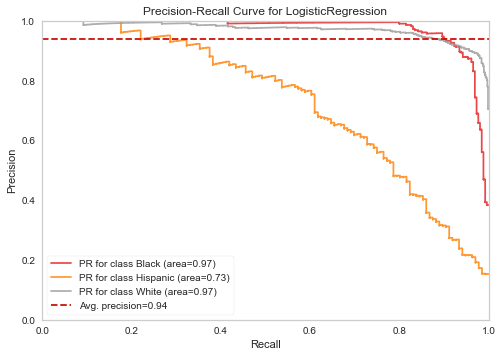

In [103]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

viz.score_' a bakarak yukaridaki grafikteki skorlari yazdirabiliriz :

In [1]:
viz.score_  #["Hispanic"]   # Bu skorlari asagida kiyaslayabilmek icin asagida bir degiskene atadik. 

NameError: name 'viz' is not defined

Multiclass datalarda f1, recall, precision skorlari icin __average__ mutlaka belirtilmeli. Biz sinifin direk kendisini istedigimiz icin, ortalama deger istemedigimiz icin none olarak belirttik. (Multiclass' larda average belirtilmek zorunda.)

labels=["Hispanic"] -----> Hangi class' in skoru alinacak ise mutlaka koseli parantez icinde yazilmali. Tercihe gore koseli parantez icine virgul konup diger class isimleri de yazilabilirdi. Eger birden fazla class ismi belirtilirse average=macro veya average=weight yazilir ve belirtilen class' larin ortalama degerleri dondurulur. Biz burada tek bir class' a ait skorlara bakacagiz.

In [ ]:
log_AP = viz.score_["Hispanic"]    # log modelden aldigimiz Hispanic classs' ina ait Avg. precision skoru

Asagida sadece Hispanic' lere ait test skorlarini aldegiskenlere atadik :

In [105]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"] 
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])            # Hispanic f1 skoru
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])    # Hispanic recall skoru

## Lojistic Regression solver "liblenear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verdigi icin yukaridaki GridSearch isleminde denemistik ama en iyi score' da bunu secmedi. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

In [52]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

Kurdugumuz bu modelde Black ve White skorlarinin cok iyilestigini goruyoruz. Hispanic skorlari yukaridaki skora gore dusuk fakat precision, recall ve f1 skorlari birbirleriyle cok dengeli. Musteriye dengeli skorlar olarak bu odel sunulabilir. Boyle dengeli bir modelden yeniden bir treshold tespit edilip, dengesiz datasetimiz icin precision ve recall' i birbirine olabildigince yaklastirabiliriz. Biz simdilik bunu tercih etmedik.

In [53]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[246   3  11]
 [  5  96  35]
 [ 19  33 706]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       260
    Hispanic       0.73      0.71      0.72       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 973   19   46]
 [  30  385  128]
 [  44  147 2843]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



Cross Validate islemi ile Hispanic skorlarimizi teyit ettik. Tek seferlik skorlara gore biraz dusuk ciksa da asagi yukari ayni skorlari elde ettik :

In [54]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.644959
test_precision_Hispanic    0.662196
test_recall_Hispanic       0.631380
dtype: float64

## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  __class_weight="balanced"__ belirttik.

Scale islemi icin pipeline' i sifirdan kurmak zorundayiz. Cunku icinde kullanacagimiz model ismi degisti.

In [55]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

SVC skorlarinin asagi yukari Logistic Regression ile yakin skorlar elde ettik. Precision degeri yukarida %52 idi, burada %48' e dusmus; f1 skoru yukarida %64 idi burda %61' e dusmus 

In [56]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 111  20]
 [ 22 107 629]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   41   38]
 [  22  452   69]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



Cross Validate isleminden aldigimiz skorlarin tek seferlik skorlar ile yakin oldugunu soyleyebiliriz :

In [57]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.571221
test_precision_Hispanic    0.457893
test_recall_Hispanic       0.762256
dtype: float64

###  SVC Model GridsearchCV

In [58]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]    # Makine gucunden dolayi cok genis tutmadik
}

In [59]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]

# GridSearch veya Cross Validate oncesi modeli sifirlamak onemli.

In [ ]:
model = Pipeline(steps=operations_svc)

Asagida yine sadece recall_hispanic skorlarini tanimladik. Cunku onu yukseltecek best parametreleri ariyoruz :

In [ ]:
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [60]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

Grid Search best_parametre degerlerinden gamma' yi default deger olan 'scale' olarak bulmus; C degerini ise 2' ye cikarmis :

In [61]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

Grid Search best_score' u 0.76 olarak buldu. Yukarida Cross Validate ile elde ettigimiz skora yakin bir skor cikti :

In [62]:
svm_model_grid.best_score_

0.764186204553177

Grid Search islemi sonrasi Hispanic class' ina ait precision degerinin biraz daha arttigini arttigini, diger skorlarin pek degismedigini goruyoruz. Logistic model skorlarina yaklastik :

In [63]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [  5 111  20]
 [ 22  92 644]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   36   34]
 [  19  462   62]
 [  55  371 2608]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.85      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.87      0.88      4615



In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

# PrecisionRecall oncesi modelimizi sifirladik.

Logistic modelde PrecisionRecall' da  Hispanic class' inin genel performansi %73 idi burda %71' e dustu. :

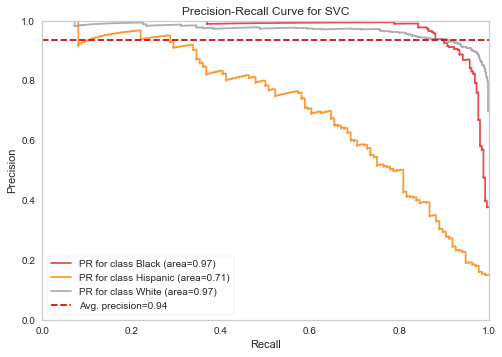

In [64]:
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

Tum model sonuclarini asagida karsilastirmak icin cikan skorlarimizi tekrar degiskenlere atadik :

In [65]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

Tree based modellerde dummies feature kullanilmaz; onun yerine OrdinalEncoder kullanilir :

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
X2 = data.drop("DODRace",axis=1)          # Encoder icin yeni bir X degiskeni atadik.
y = data.DODRace                          # y' ye Encoder islemi uygulanmaz.

In [68]:
cat = X2.select_dtypes("object").columns
cat                                        # OrdinalEncoder icin object feature' lari bir degiskene atadik.

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [69]:
enc = OrdinalEncoder()    # Ordinal Encoder' i tanimladik.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

In [ ]:
X2[cat] = enc.fit_transform(X2[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X2.head()

Kategoric olan feature' lar Encoder ile sayisal verilere donustukten sonra yukaridaki modeller ile karismasin diye yeni degiskenler ile train ve test datalari olusturduk :

In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [71]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

__class_weight="balanced"__ bastan belirledik conku datamiz unbalance durumda. 

In [72]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [73]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

Balance yapmis olmamiza ragmen Hispanic class' inin test setine ait recall ve f1 skorlari cok kotu cikti. Train setindeki skorlar %100, Test seti skorlari cok kotu. Overfitting durumu var. Sonraki adimlarda hyperparametreler ile oynayarak skorlari iyilestirmeye calisacagiz :

In [74]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[192   1  67]
 [  9   5 122]
 [ 11   0 747]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.81       260
    Hispanic       0.83      0.04      0.07       136
       White       0.80      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.85      0.59      0.59      1154
weighted avg       0.83      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



Cross Validate islemi sonrasinda aldigimiz skorlarin tek seferlik skorlar ile benzer oldugunu goruyoruz :

In [75]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.082574
test_precision_Hispanic    0.775000
test_recall_Hispanic       0.044242
dtype: float64

### RF Model GridsearchCV

RF modelin GridSearch islemi cok uzun surdugu icin __min_samples_split':[18,20,22]__ deneyemedik ki asil overfitting' i engelleyecek kisim bu idi. Bu parametrenin default degeri 2 idi (yapragin bolunme sarti). Overfitting' i  azaltmak icin bolunme sartini artirmamiz gerekiyordu. (Deneyince de skorlar biraz iyilesecek ama %30' u gecemeyecek) :

In [76]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [77]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [78]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [79]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [80]:
rf_grid_model.best_score_

0.22466870540265033

Model, overfitting' i engellerken oncelikle test seti skorlarini train setine dogru cekmeye calisir; basaramaz ise train seti skorlari test seti skorlarina yaklasir. Su anda Random Forest modele ne yaparsak yapalim skorlar cok fazla duzelmeyecek :

In [81]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[210   2  48]
 [ 14  32  90]
 [ 21  28 709]]
              precision    recall  f1-score   support

       Black       0.86      0.81      0.83       260
    Hispanic       0.52      0.24      0.32       136
       White       0.84      0.94      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.66      0.68      1154
weighted avg       0.80      0.82      0.81      1154


Train_Set
[[1023    1   14]
 [   0  532   11]
 [   3   19 3012]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1038
    Hispanic       0.96      0.98      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.99      0.99      4615
weighted avg       0.99      0.99      0.99      4615



Hispanic class' ina ait genel performans  skoru %42 cikti. Genel performans cok kotu.

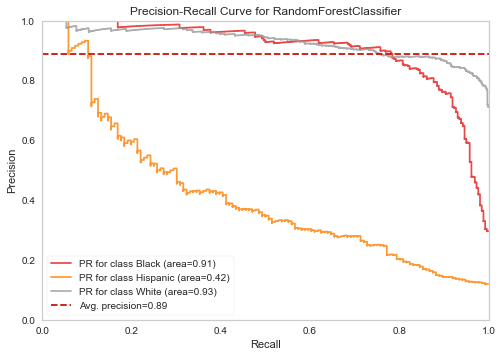

In [82]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [83]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [84]:
xgb_model = XGBClassifier(random_state=101)

Sklearn kutuphanesinde __class_weight__ adinda bir fonksiyon var. Eger modelde unbalance datalari dengeli hale getirecek bir hyperparametre yok ise class_weigh fonksiyonu kullanilarak datadaki dengesiz veriler dengelenebilir. Asinda modelin icinde unbalance datalarda balance saglamak icin kullanilan __scale_pos_weight__ parametresi var ama bu sadece 2 class oldugu zaman ise yarar. Burada 2' den fazla class var, bu yuzden kullanamiyoruz :

In [85]:
from sklearn.utils import class_weight

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

__compute_sample_weight__ ----> Gozlem agirliklarini sayilarina gore hesapla. Icine class_weight ve train datasini verdik :

In [ ]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights    # Grid Search' de bu degiskeni kullanacagiz.

__classes_weights__ degiskenini fit asamasinda yazdigimizda, agirliklandirma islemini burada yapmis oluruz :

In [86]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

XGBClassifier(objective='multi:softprob', random_state=101)

Eger ki __class_weight__ ile datalari dengeli hale getirmeseydik cok daha kotu sonuclar alacaktik. Bu islemden sonra bile skorlarimizin cok iyi olmadigini goruyoruz. Hispanic class'inin Train ve Test set skorlari arasinda cok fark var; yani overfitting bir durum var. Asagida bu skorlari GridSearch isleminde hyperparametreler ile oynayarak skorlari duzeltmeye calisacagiz :

In [87]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[229  11  20]
 [ 10  90  36]
 [ 44 106 608]]
              precision    recall  f1-score   support

       Black       0.81      0.88      0.84       260
    Hispanic       0.43      0.66      0.52       136
       White       0.92      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.84      0.80      0.81      1154


Train_Set
[[ 977   27   34]
 [  15  471   57]
 [  79  323 2632]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1038
    Hispanic       0.57      0.87      0.69       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



Cross Validate sonucu aldigimiz skorlar yukaridaki tek seferlik skorlar ile benzer :

In [88]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.518818
test_precision_Hispanic    0.438450
test_recall_Hispanic       0.636936
dtype: float64

### XGBoost Model GridsearchCV

Yukarida olusturdugumuz degisken olan classes_weights' i DataFrame' e donusturerek bir degiskene atadik :

In [6]:
comp = pd.DataFrame(classes_weights)

<IPython.core.display.Javascript object>

NameError: name 'classes_weights' is not defined

In [ ]:
# y_train2.reset_index(drop=True)

Icerisine __label__ isminde bir sutun atadik. Bu sutunun icine deger olarak y_train2' yi indexlerini sifirlayarak verdik (Modelden gelen indexler gelmesin diye). 

In [89]:
comp["label"]= y_train2.reset_index(drop=True)

<IPython.core.display.Javascript object>

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

label' a gore groupby yaptigimizda her class icin agirlik katsayilarini verdi. Yani class' lardaki degerleri bu sayilarla carpacak. En fazla agirligi Hispanic class' ina vermis cunku en az sample sayisi ona ait. (1038 Black, 543 Hispanic, 3034 White sample var)

In [ ]:
comp.groupby("label")[0].value_counts()

In [90]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}      # colsample_bytree ---> max_feature ile ayni

GridSearch isleminde yine sadece Hispanic class' ina ait skorlari hesapliyoruz :

In [91]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [92]:
xgb_grid_model.best_params_     #colsample_bytree ve subsample haric diger parametreler default degerlerinde :

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [93]:
xgb_grid_model.best_score_

0.6224600747536527

Grid Search islemi sonrasi hala skorlarda cok fazla bir iyilesme yok ve Train ve Test set arasinda da cok fazla farki var. Hyperparametreler ile daha fazla oynamak gerekiyor. Test set skorlarinin Train set skorlarina daha fazla yaklasamadigini goruyoruz. Demek ki hyperparametreler ile oynadigimizda Train set skorlari Test set skorlarina yaklasmaya baslayacak :

In [94]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[229  15  16]
 [ 10  89  37]
 [ 40 111 607]]
              precision    recall  f1-score   support

       Black       0.82      0.88      0.85       260
    Hispanic       0.41      0.65      0.51       136
       White       0.92      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.84      0.80      0.81      1154


Train_Set
[[ 976   24   38]
 [  23  467   53]
 [  84  327 2623]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.57      0.86      0.69       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



XGBoost ve Random Forest' in bu datasetinde cok kotu skorlar verdigini soyleyebiliriz.

XGBoost modelin, Hispanic class' ina ait recall degerini tahmin etmedeki genel performansi %61 : 

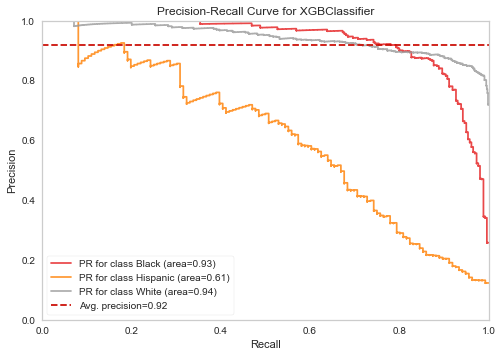

In [95]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

Hispanic class' ina ait skorlari her modelde asagidaki gibi degiskenlere atamistik. f1 ve recall skorlari burada array dondurur. Bu yuzden asagida modelleri kiyaslamak icin yazdigimiz fonksiyonda mutlaka  log_f1[0] seklinde belirterek array icinden degerlerimizi cekmemiz gerekir. 

In [96]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

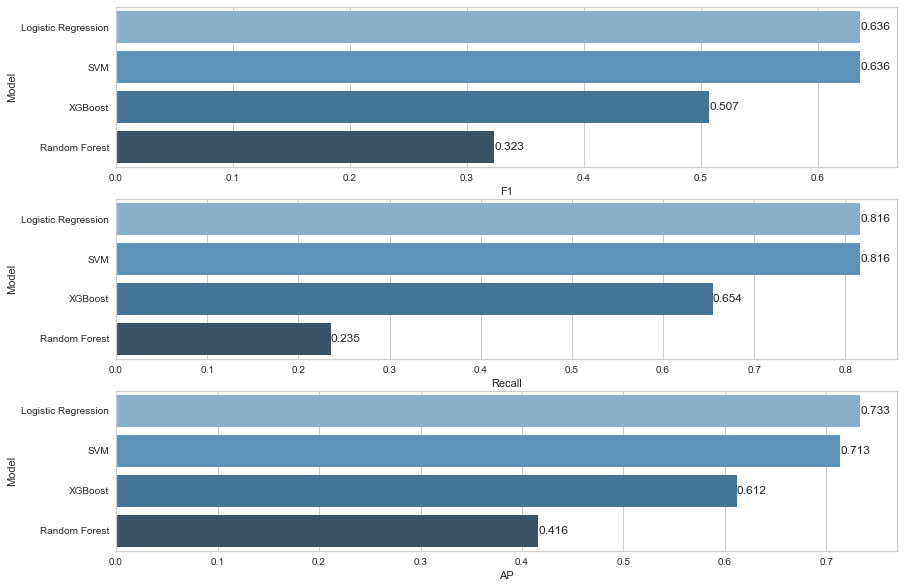

In [109]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)
plt.show()

f1 score ve recall' da Logistic model ve SVM skorlarinin birbirlerine yakin oldugunu; genel performansa baktigimizda (AP) ise Logistic Regression' in biraz daha yuksek oldugunu goruyoruz. Bu yuzden Logistic Modeli secmek mantikli olur. Skorlar ayni olsa bile SVM modeli secmek mantikli olmaz. Cunku bu modelde calisma maliyeti yuksek ve feature importance yapamiyoruz. Logistic Regression' da feature importance yapabiliriz (Ridge-Lasso).

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

Final model icin pipeline' i yeniden tanimlayarak modelimizi egitiyoruz :

In [265]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [266]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Asagidaki tum feature' lardaki mean degerlerini alip bir insana aitmis gibi modele prediction yapmasi amaciyla verdik : 

In [274]:
X.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     5769.000000     5769.000000            5769.000000         5769.000000   5769.000000              5769.000000       5769.000000        5769.000000                5769.000000       5769.000000       5769.000000         5769.000000       5769.000000                5769.000000         5769.000000           5769.000000   5769.000000    5769.000000        5769.000000             5769.000000        5769.000000      5769.000000   5769.000000         5769.000000  5769.000000  5769.000000   5769.000000            5769.000000                     5769.000000  5769.000000  5769.000000    5769.000000      5769.000000       5769.000000            5769.000000  5769.000000                5769.000000                 5769.000000            5769.000000        5769.000000          5769.000000  5769.000000        5769.000000  5769.000000  5769.000000        5769.000000  5769.000000             5769.000000  5769.000000  5769.000000        5769.000000         5769.000000   
mean                       247.254290     1408.630265             328.071590          225.201768   1301.902583               244.408043        195.118911         399.706015                 341.663027        274.903449        491.454845           72.335413        324.962212                 306.677760          139.529381           1022.059456    242.234356     872.112845         610.449991              498.331773         386.316519      1479.952158    283.232623         1024.206622   252.322586  1254.290172    827.105738             622.693708                      351.880222    35.175420    62.606171      22.227249       240.553302        786.399203              98.915063   263.512394                 339.458832                  295.661640             553.098284         467.898769          1104.347201    85.098111         204.215635   189.574796   152.043682         570.424337   196.640839              333.274918    70.834113   348.930837         386.417923         1042.152366   
std                         37.457748       78.303123              20.444554           15.965783     71.260913                16.803556         13.379000          30.124094                  41.270615         19.239580         42.011888            5.326965         17.050426                  20.818789            7.248670             75.952953     26.409001      54.064846          33.120828               28.512562          30.577787        83.590746     20.612214          100.375776    26.660255    78.882449     54.056267              45.087220                       29.807293     3.221118     4.861629       3.149012        28.595503         41.843182               6.658949    17.231642                  23.081597                   29.857253              62.255490          29.785714            67.719289     6.320915          15.486056    11.422521     6.176650          18.245395     8.322907               22.260663     5.932530    25.191381          32.273943           59.102058   
min                        155.000000  

In [273]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.254290
acromialheight                                  1408.630265
acromionradialelength                            328.071590
anklecircumference                               225.201768
axillaheight                                    1301.902583
balloffootcircumference                          244.408043
balloffootlength                                 195.118911
biacromialbreadth                                399.706015
bicepscircumferenceflexed                        341.663027
bicristalbreadth                                 274.903449
bideltoidbreadth                                 491.454845
bimalleolarbreadth                                72.335413
bitragionchinarc                                 324.962212
bitragionsubmandibulararc                        306.677760
bizygomaticbreadth                               139.529381
buttockcircumference                            1022.059456
buttockdepth                            

In [269]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

Yukarida 201. satirdaki gozlemi modelin tahmin etmesini istedik, Hispanic olarak tahmin etti. Asagida 201. satirdaki gozlemin gercek degerine baktik, o da Hispanic cikti. Yani modelimiz dogru tahmin yapti.

In [270]:
y[201]

'Hispanic'

Yukarida datanin mean degerlerini kullanarak olusturdugumuz DataFrame' i de tahmin icin verdik, modelimiz bunu White olarak tahmin etti (Koseli parantez icine aliyoruz cunku modelimiz DataFrame, prediction' i da DataFrame' e cevirmemiz gerekir). Datada White class' i agirlikta oldugu icin bu class' i dondurmesi mantikli  :

In [271]:
final_model.predict([mean_human])

array(['White'], dtype=object)

----------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------

__Yukaridaki modellerde aldigimiz skorlari daha fazla iyilestirebilmek icin farkli yontemler deneyecegiz :__

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

__matthews_corrcoef__ ------> Aldigimiz gercek degerler ile tahmin edilen degerler arasindaki correlation. 

__matthews_corrcoef__ ve __cohen_kappa_score__ ------> eval_metric' de skorlarimizi aldigimizda, accuracy, makro, weighted ve class' larin kendilerine ozel skorlarinin hepsnin birbirinden farkli oldugunu gormustuk. Bunlarin hepsinin skorlarina binaen genel bir skor almamizi saglayan metriklerdir. Dengesiz veri setlerinde kullanilirlar. 

In [127]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7827657214688859

matthews_corrcoef skoru %78, cohen_kappa_score ise %77  olarak genel bir model performans hesaplamis. Accuracy, recall, f1 score veya diger skorlar yerine bu skorlara bakabiliriz. Aldigimiz bu skorlar yukarida modelin genel performansinda aldigimiz skor (log_AP) ile hemen hemen ayni. Dengesiz veri setlerinde bu skorlara da bakilabilir. 

In [128]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7737579800746648

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

In [ ]:
over = SMOTE()
under = RandomUnderSampler()   # Default degerler ile baktik.

__over_sampling__ -----> Tum class' lardaki gozlem sayilarini en buyuk class' taki gozlem sayisina esitle. (Default deger)

__under_sampling__ -----> Tum class' lardaki gozlem sayilarini en kucuk class' taki gozlem sayisina esitle. Eger bunu yaparsak skorlar cok iyi cikacaktir ki bu istemedigimiz bir durum. 

!!! Smote sadece Train set' e uygulanir test setinde gozlem sayisi artirilmaz. Eger test setinde de gozlem sayisini artirirsak skorlar cok iyi cikar ve bu bizi yaniltir. !!!

Smote icindeki parametre olan __k_neighbors=5__ ile gozlemin etrafindaki 5 tane veriye bakar ve onlarin ortalama degerini alarak yeni bir veri olusturur. Gozlem sayisini aritma islemini bu sekilde yapar. Bu sekilde yapay veriler olusmus olur. 'under' yapmak istedigimizde ise istenen kadar veriyi direk siler. 

In [ ]:
#!pip install imblearn

In [129]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

Hem over_sampling hem de under_sampling datada noise olusturur, ikisini de istemiyoruz. Smote icinde bir parametre olan __sampling_strategy__' i kullanarak hangi class' in ne kadar artirilmasi veya azaltilmasini istedigimizi belirtiyoruz. Biz burda 543 olan Hispanic sayisini 1200' e cikarmasini; White sayisini ise 2500' e dusurmesini istedik. Class' lardaki sayilari olabildigince dengeli bir sekilde birbirlerine yaklastirmaya calisiyoruz. Cok buyuk degisimler saglikli sonuc vermeyecektir. Deneme yanilma yolu ile datanin dogal yapisini bozmayacak sekilde ne kadar ekleme yapip cikarmamiz gerektigine karar verebiliriz. Cok hard bir sekilde veriyi artirma veya azaltma islemi hicbir zaman dogru sonuc vermez :

In [130]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

Yukarida tanimladigimiz degiskenlere gore asagida over ve under' i ayri ayri fit ettigimizde class sayilarinin degistigini goruyoruz :

In [131]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [132]:
y_resampled_over.value_counts()

White       3034
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [133]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [134]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

Black class' inin sayilari ile oynamadik cunku Hispanic ve white class' lari birbirleri ile karisiyorlar. 

over ve under islemlerini yukarda tek tek yaptik. Bunun yerine asagida tek bir islem ile de yapabiliriz. Asagida once Smote' un kendi pipeline' ini imblearn kutuphanesinden import ederek uyguluyoruz. Burada sklearn kutuphanesinin pipeline' ini kullanamiyoruz cunku ona sadece fit, transform ve predict islemleri uygulanabilir. Fakat burada bizim amacimiz over_sampling ve under_sampling islemi yapmak ve bunu da __fit_resample__ ile yapabiliriz. 

steps' de once ilgili class' larin sayilarini artir; sonra ilgili class' larin sayilarini azalt dedik. Bunu daha sonra pipeline icine tanimladik ve sonra fit_resample(X_train, y_train) yaparak islemi uyguladik. Class sayilari istedigimiz degere geldi.

In [135]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [136]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [137]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

over_sampling ve under _sampling islemini Logistic Regression' a uygulayacagiz. Yapacagimiz islemlerin ayrintisini asagidaki not uzerinden inceleyebiliriz :

Smote isleminde sklearn kutuphanesinin pipeline fonksiyonunu kullanamiyoruz. Cunku orda __fit_resample__ islemini uygulayamiyoruz. Bu yuzden imblearn kutuphanesinin pipeline' ini kullandik. 

Asagida operations' da once over, sonra under, sonra scale, en son da modelimizi degiskenin icine tanimlamis olduk.

In [138]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [139]:
smote_pipeline = imbpipeline(steps=operations)

In [140]:
smote_pipeline.fit(X_train, y_train)    

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Hispanic skorlarimizin hem Train hem de Test setinde dustugunu gorduk. Yani bu datada skorlarimizi Smote islemi duzeltemedi.

In [141]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[245   6   9]
 [  7 100  29]
 [ 26  73 659]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.56      0.74      0.63       136
       White       0.95      0.87      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.85      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
[[ 977   28   33]
 [  32  408  103]
 [  63  265 2706]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1038
    Hispanic       0.58      0.75      0.66       543
       White       0.95      0.89      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.86      0.83      4615
weighted avg       0.90      0.89      0.89      4615



Cross Validation ile de Smote' tan aldigimiz tek seferlik skorlarin uyumlu oldugunu gorduk. Class' lari ic ice gecmi datalarda Smote skorlari iyilestirir fakat buradaki gibi class' lari ic ice gecmis datalarda iyi bir sonuc vermez. 

In [142]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.606436
test_precision_Hispanic    0.538611
test_recall_Hispanic       0.695892
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

Shap; bir tahmin yaparken gozlem bazinda veya tum data icinde class' lari tahmin ederken hangi feature' in ne kadar katkisi var, bunu gosterir. Mesela bu datada Hispanic class' ina ait feature' lari secip sadece onlar uzerinden bir feature selection yaparsak skorlarimiz daha az gozlem sayisi ile daha iyi olabilir. Daha once yaptigimiz feature importance isleminden daha farkli bir islem.

In [143]:
# !pip install shap

!! Shap metodunda pipeline kullanilmaz, normal scale islemi uygulamamiz gerekir!! 

Feature importance isleminin basarili olmasi icin ise datanin mutlaka scale edilmis olmasi gerekir. Bu yuzden hem X_train hem de X_set' e scale islemini uyguladik. Dummy uygukanmis feature' lar kullandigimiz icin de MinMaxScaler kullandik. 

In [239]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature importance yapabilmek icin Lasso uygulamamiz gerekir; bu yuzden __penalty='l1'__ olarak seciyoruz. Ridge secersek feature importance yapamayiz. l1; liblinear ya da saga ile kullanilir. 'saga' normalde buyuk datalarda kullanilir fakat recall skorlari daha iyi ciktigi icin saga' yi sectik.

Shap ile model uygulanirken, hangi class' la ilgili problem varsa o class' a ait skorlarin en iyi oldugu modeli secmemiz gerekir. Bu yuzden biz Logistic' te Hispanic class' i icin en iyi sonucu  elde ettigimiz parametreleri tanimladik. Feature selection yapacagimiz icin tahminlerin iyi oldugundan emin olmamiz gerekir. Mesela XGBoostve Random Forest modelleri burada kullanamazdik cunku skorlarinin cok kotu oldugunu biliyoruz. SVM model feature selection' da tercih edilmez, cunku kotu sonuclar verir. Feature selection yapilabilecek modellerin secilmesi dogru olur.

In [240]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

Sectigimiz parametreler ile datamizi egittigimizde asagidaki skorlari elde ettik, skorlar cok iyi degil. 

In [241]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[244   9   7]
 [  5 111  20]
 [ 29  90 639]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   38   32]
 [  21  455   67]
 [  68  350 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



"203. index' teki gozlemde hangi feature' larin daha fazla katkisi var?" diyerek sadece bir gozleme bakmak istedik. 

Shap' i import ettikten sonra tahminlerimizin iyi oldugu modeli (model_shap) ve X_train' i icine verdik. En son kodda ise X_test' in baslangic ve bitis indexlerini verdigimizde bize su sonucu dondurur : Verilen gozlemi tahmin etmede hangi feature' in daha cok katkisi var?

In [246]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [ ]:
shap_values sinif sayisi kadardir. 

In [ ]:
shap_values

In [247]:
shap_values[0][0]     

# Ilk class' i (White) tahmin etmede hangi feature' larin ne kadar katkisi var?
# Cogu degerin Lasso' dan dolayi 0 oldugunu goruyoruz. Dogru feature selection yapabilmek icin l1 kullanmak onemlidir. 
# Degerlerin her birisi bir feature' a denk gelir.

[array([[ 0.        ,  0.        ,  0.        , -0.37497885,  0.        ,
         -0.04934262,  0.        ,  0.        ,  0.19115688, -0.61019247,
          0.        , -0.0245037 ,  0.67228956, -0.04718408, -0.09910747,
          0.        ,  0.05943078,  0.01781323,  0.33808522,  0.        ,
          0.        ,  0.        , -0.26872411, -0.08188797, -0.2538421 ,
         -0.01559623,  0.        , -0.02615699, -0.01030821, -0.02294333,
         -0.0518531 ,  0.01621033,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.1656754 , -0.23253594,  0.32583326,
          0.        ,  0.        ,  0.        ,  0.32750758, -0.13161115,
          0.22137673,  0.        ,  0.38142834,  0.60748345, -0.15563905,
         -0.59204564, -0.06464277,  0.13554446, -0.00283402, -0.04032095,
          0.        ,  0.        , -0.04987609, -0.16715605,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.20113765,
          0.        ,  0.28551128,  0.

In [ ]:
shap_values[1][0]   

# Hispanic class' ini secmekte hangi feature' in ne kadar katkisi var?

In [ ]:
shap_values[2][0]   

# Black class' ini secmede hangi class' in ne kadar katkisi var?

In [248]:
shap_values[0].shape

(1, 232)

__Asagidaki visualize isleminin aciklamasi :__

model_shap.predict(X_test_scaled[start_index:end_index])[0] ----> 203. index' teki gozlem icin feature' larin onem sayisi.

shap_values[1] ---->  Hispanic sinifini tahmin etmek icin hangi feature' in ne kadar katkisi var bunu gosterir.

In [ ]:
feature_names= X.columns ----> Feature isimlerini goster

In [249]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],                       
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

The log_model predicted: Hispanic


Kirmizi renkler; hangi feature' in Hispanic class' ini tahmin etmede ne kadar katkisi oldugunu gosteriyor. Buyukluk ne kadar fazla ise katkisi o kadar fazla demek. Renklerin altinda feature isimlerini ve degerlerini de gorebiliyoruz.

Mavi renkler ise tahmindeki negatif etkiyi gosteriyor. Yani en genis boyutta olan tahmin etmede en kotu feature. (Bu grafigi tek bir gozlem icin cizdirdik.)

In [250]:
explainer.expected_value[1]

# Hispanic class' inin ilk base degeri. 
# Yani model, butun Hispanicler icin -0.81 olasiligi ile baslayacak. (Gradient Descent' te oldugu gibi)
# Bu deger, %50 olasiliktan dusuk bir deger anlamina geliyor.

-0.8158517877049192

In [251]:
X_test_scaled[203]

array([0.37162162, 0.55493482, 0.58333333, 0.60583942, 0.57433809,
       0.67521368, 0.65957447, 0.88349515, 0.5729927 , 0.62424242,
       0.75714286, 0.69444444, 0.7027027 , 0.44137931, 0.76595745,
       0.56325823, 0.54696133, 0.50717703, 0.56809339, 0.54222222,
       0.56809339, 0.63584906, 0.76666667, 0.56976744, 0.45070423,
       0.59960159, 0.52019002, 0.54601227, 0.51555556, 0.52380952,
       0.48571429, 0.38095238, 0.53      , 0.71595331, 0.63265306,
       0.7079646 , 0.67721519, 0.56435644, 0.62686567, 0.63793103,
       0.66320166, 0.68421053, 0.68181818, 0.5505618 , 0.5       ,
       0.6171875 , 0.76      , 0.70833333, 0.73333333, 0.46116505,
       0.51724138, 0.57437071, 0.53846154, 0.76369863, 0.76383764,
       0.524     , 0.59533074, 0.5785124 , 0.56      , 0.588     ,
       0.75384615, 0.71304348, 0.74458874, 0.62686567, 0.58333333,
       0.57272727, 0.66666667, 0.79679144, 0.63815789, 0.79487179,
       0.68953069, 0.72037915, 0.62207358, 0.67794486, 0.62068

Asagida ayni gozlem icin feature etkilerine 0 class' i (White) ve 1 class' i (Black) icin de baktik :

In [151]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [152]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

Yukarida 3 class icin de ayni gozleme ait grafiklere baktigimizda, Hispanic : -1.01; White : -1.47; Black : -1.72 degerlerini almis. Buradan cikaracagimiz sonuc; bu gozlem icin en dusuk deger Hispanic class' ina ait. (Eksi degerler %50' den dusuk bir orana karsilik gelir. Hepsi %50' den dusuk cikmis ama en dusugu Hispanic)

Yukarida ornek olmasi acisindan, bir gozlem icin hangi feature' in ne kadar katki sagladigina baktik. Simdi asagida butun gozlemler icin hangi feature' in tahminlemeye ne kadar etkisi var bunu gorelim :

## Shap values for all data

!! Shap icin feature importance' i olan modeller kullanilabilir. (Logistic Regression [l1 ile] veya Tree based modeller) !!

Shap' in icine modeli ve scale edilmis olan X_train' i verdik. shap_values' un icine de X_test' i verdik ki hangi feature' in class' lari tahmin etmede ne kadar etkisi var bunu gozlemleyelim :

In [252]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

Asagida kuvvetli ilk 13 feature arasinda Hispanic class' i tespit edilememis. Bu feature' larda White ve Black' ler cok iyi tespit edilmis. Hispanic' lerin tespiti 13. feature' dan sonra baslamis. Eger Shap yerine normal feature importance yapsaydik en guclu frature' lari secmis olsaydik Hispanic class' ina ait skorlar cok kotu cikacakti. 

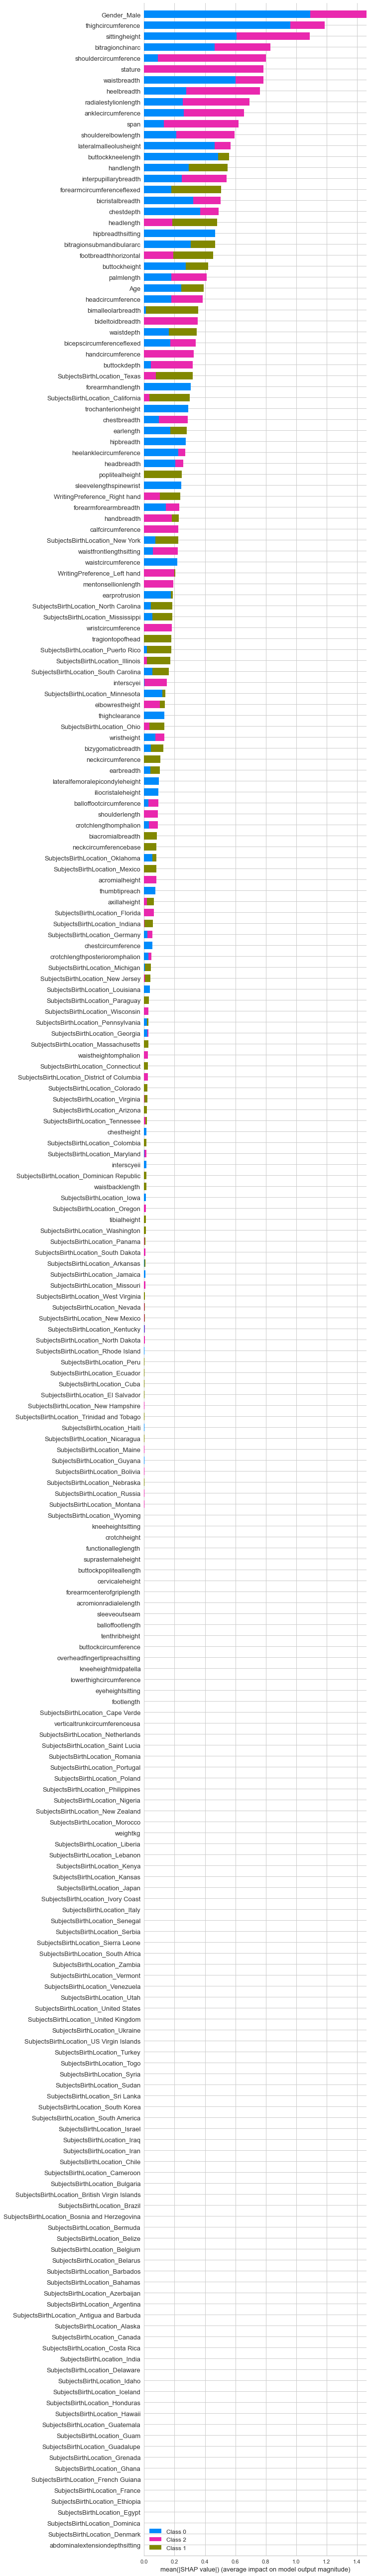

In [253]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

# Train test' i verdik ki data leakage olmasin.
# max_display=300 ----> "300 feature goster"

Yukaridaki grafige gore, Hispanic' leri tespit etmede en cok katkisi olan feature' lar ile asagida bir liste olusturduk : 

Data Cleaning asamasinda dogum yerleri ile ilgili olan feature' i (SubjectsBirthLocation) tutmustuk. Grafigi incelersek dogum yerinin Hispanic' leri tespit etmede onemli bir yer tuttugunu gorebiliriz.

In [155]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [156]:
#list(X.columns)

Sectigimiz feature' lar ile yeniden X ve y yi olusturup modelimizi kuracagiz :

In [157]:
X3 = data[hispanic]    
X3 = pd.get_dummies(data=X3, drop_first=True)
y = data.DODRace

<IPython.core.display.Javascript object>

hispanic degiskeninde 19 feature vardi fakat get_dummies isleminden sonra feature sayisinin 154' e ciktigini goruyoruz. (Bu feature' larin cogu SubjectsBirthLocation' dan geldi)

In [158]:
X3.shape 

(5769, 154)

In [159]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

Yukarida Logistic Regression icin sectigimiz parametreleri tekrar vererek yeni belirledigimiz feature' lar ile modelimizi yeniden kurduk :

In [160]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

__!!!!__ Shap' e verilen penalty="l1" olmak zorunda. l2 ile feature selection yapilmaz. __!!!!__

In [161]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

Shap ile kurdugumuz bu modelde White ve Black skorlarinin da nispeten dustugunu goruyoruz bununla beraber Hispanic recall skoru yukseldi. Eger klasik yontem ile feature selection yapsaydik en cok one cikan feature' lari alacaktik, Hispanic skorlarimiz cok kotulesecekti. 

In [162]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[216  13  31]
 [  8 108  20]
 [100 125 533]]
              precision    recall  f1-score   support

       Black       0.67      0.83      0.74       260
    Hispanic       0.44      0.79      0.57       136
       White       0.91      0.70      0.79       758

    accuracy                           0.74      1154
   macro avg       0.67      0.78      0.70      1154
weighted avg       0.80      0.74      0.76      1154


Train_Set
[[ 872   48  118]
 [  32  441   70]
 [ 362  507 2165]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76      1038
    Hispanic       0.44      0.81      0.57       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



Skorlarimizi Cross Validate ile teyit ettik :

In [163]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.538547
test_precision_Hispanic    0.418883
test_recall_Hispanic       0.756667
dtype: float64

Shap' ten sonra PrecisionRecallCurve' de de Hispanic class' ina ait skor %70 cikmis : 

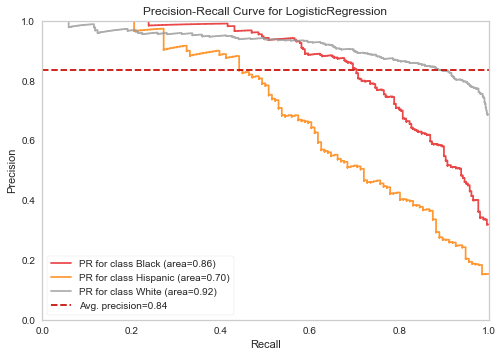

In [164]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

Iyilestirdigimiz skora tekrar smote islemini uygulayalim :

## SMOTE for X3 dataset

Sifirdan pipeline kurup Shap ile olusturdugumuz train datalarini tekrardan egittik :

In [165]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [166]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [167]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Smote islemi skorlarimizi dusurdu. Demek ki smote' u kullanmamaliyiz :

In [168]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[211  16  33]
 [ 10  97  29]
 [114 100 544]]
              precision    recall  f1-score   support

       Black       0.63      0.81      0.71       260
    Hispanic       0.46      0.71      0.56       136
       White       0.90      0.72      0.80       758

    accuracy                           0.74      1154
   macro avg       0.66      0.75      0.69      1154
weighted avg       0.79      0.74      0.75      1154


Train_Set
[[ 868   55  115]
 [  40  382  121]
 [ 402  358 2274]]
              precision    recall  f1-score   support

       Black       0.66      0.84      0.74      1038
    Hispanic       0.48      0.70      0.57       543
       White       0.91      0.75      0.82      3034

    accuracy                           0.76      4615
   macro avg       0.68      0.76      0.71      4615
weighted avg       0.80      0.76      0.77      4615



In [169]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.544768
test_precision_Hispanic    0.462192
test_recall_Hispanic       0.664579
dtype: float64

## Find the best threshold for multiclassification

Best treshold' u secme islemini sadece binary datalarda yapabiliyorduk. O yuzden asagida Hispanic class' ina 1, diger class' lara 0 dersek, target' i binary haline getirmis oluruz :

In [170]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [171]:
y2

0       0
1       0
2       0
3       0
4       0
       ..
5764    1
5765    1
5766    0
5767    1
5768    1
Name: DODRace, Length: 5769, dtype: int64

Yeni target labelimiz ile datamizi yeniden bolup, pipeline kurup, egitelim : 

In [172]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

<IPython.core.display.Javascript object>

In [173]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [174]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Hispanic (1) class' ina ait skorlara baktigimizda; precision skorunun biraz dustugunu fakat recall skorunun yukseldigini goruyoruz. Amacimiz da recall skorunu yukseltmek. 

In [175]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[822 196]
 [ 28 108]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1018
           1       0.36      0.79      0.49       136

    accuracy                           0.81      1154
   macro avg       0.66      0.80      0.69      1154
weighted avg       0.89      0.81      0.83      1154


Train_Set
[[3381  691]
 [  88  455]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      4072
           1       0.40      0.84      0.54       543

    accuracy                           0.83      4615
   macro avg       0.69      0.83      0.72      4615
weighted avg       0.91      0.83      0.85      4615



Targettaki class' lar binary hale geldigi icin best_treshold' u bulabiliriz ve boylece recall skorunu biraz daha yukseltebiliriz. Oncelikle balance edilmemis, basic Logistic model ile plot_precision_recall_curve' u cizdirelim :

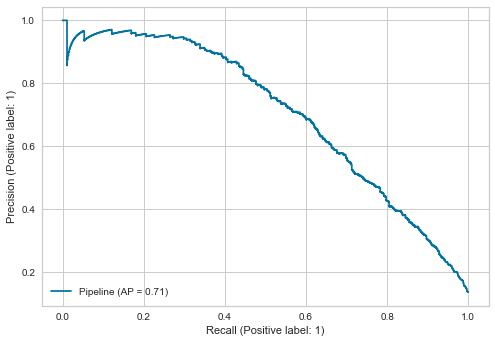

In [176]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

Yukaridaki basic model uzerinden predict_proba' yi yaptirdik :

In [177]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])     # Grafikteki sonucun aynisi :

0.7054275890950658

best_treshold' u bulmak icin asagidaki yollari izliyoruz :

In [178]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [179]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

<IPython.core.display.Javascript object>

0.3148299928300463

__!!!!__ Balance edilmemis data ile best_treshold bulunuyor; bu deger balance edilmis dataya uygulaniyor __!!!!__

best_treshold degerimiz 0.31 cikti. Buldugumuz bu best_treshold degerini daha once yukarida balance ettigimiz dengeli data setine uyguluyoruz :

In [180]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

<IPython.core.display.Javascript object>

best_treshold' u uyguladiktan sonra recall skorumuzu oldukca yukselttik, precision skoru ise dustu. B'z'm amacimiz recall skorunu yukseltmekti. Test ve Train set skorlari da birbirine yakin cikti :

In [181]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[679 339]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1018
           1       0.26      0.87      0.40       136

    accuracy                           0.69      1154
   macro avg       0.62      0.77      0.59      1154
weighted avg       0.89      0.69      0.75      1154



CrossValidate sonrasi aldigimiz skorlar da tek seferlik skorlarimiz ile birbirine yakin :

In [182]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

<IPython.core.display.Javascript object>

[[2806 1266]
 [  40  503]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      4072
           1       0.28      0.93      0.44       543

    accuracy                           0.72      4615
   macro avg       0.64      0.81      0.62      4615
weighted avg       0.90      0.72      0.77      4615



Butun denedigimiz modeller icinde en iyi skorlari aldigimiz modelleri secerek secenekler musteri ile paylasilabilir.

Elimizde Precision ve Recall skorlari %70-%70 olan model; %30-%90 olan model; %50-%80 olan modeller var. 

Precision ve Recall skorlari %70-%70 ---> 100 Hispanic' ten 70 tanesi yakalanir; bunun icin 100 tahmin yapilir. Yapilan tahmin ile recall birbiriyle dengeli. 

Precision ve Recall skorlari %30-%90 ---> 100 Hispanic' ten 90 tanesi yakalanir; bunun icin 270 tane tahmin yapilir. 

Precision ve Recall skorlari %50-%80 ---> 100 Hispanic' ten 80 tanesi yakalanir; bunun icin 160 tahmin yapilir. 

Bu notebook' ta dengesiz bir datasetine uygulanabilecek her methodu gormus olduk. 

Diyelim ki salgin hastalik soz konusu ve havalimanlarinda bu etnik tespiti cok onemli. O zaman %30-%90' lik skor secilebilir. 

In [183]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [184]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy      70.92%  std 1.84%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Precision-1   27.46%  std 1.47%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recall-1      89.32%  std 5.08%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F1_score-1    41.98%  std 2.02%


<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
